Allyson Busch 

Winter 2019, Bellevue University 

# E-Commerce Clothing Reviews: Sentiment Analysis

To start the project, I am loading the dataset and normal packages to be able to conduct the analysis. This project aims to create a sentiment analysis on a dataset of e-commerce clothing reviews that has been provided by Kaggle.

In [1]:
#libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import roc_curve, auc
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix 
from plotly import tools
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
#importing the data 
reviews = pd.read_csv("reviews.csv", index_col = 1)

In [3]:
reviews.head()

,Unnamed: 0,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
Clothing ID,,,,,,,,,,
767,0,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1080,1,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
1077,2,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
1049,3,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
847,4,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [4]:
reviews.count()

Unnamed: 0                 23486
Age                        23486
Title                      19676
Review Text                22641
Rating                     23486
Recommended IND            23486
Positive Feedback Count    23486
Division Name              23472
Department Name            23472
Class Name                 23472
dtype: int64

In [5]:
#dropping the unnecessary Unnamed: 0 column
reviews.drop(columns = "Unnamed: 0", inplace = True)

In [6]:
reviews.head()

,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
Clothing ID,,,,,,,,,
767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


After loading the dataset, I took an initial look at the first 5 lines of data in the dataset. The headers imported correctly, but there was an additional column that I dropped as it was unneeded.

In [7]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23486 entries, 767 to 1104
Data columns (total 9 columns):
Age                        23486 non-null int64
Title                      19676 non-null object
Review Text                22641 non-null object
Rating                     23486 non-null int64
Recommended IND            23486 non-null int64
Positive Feedback Count    23486 non-null int64
Division Name              23472 non-null object
Department Name            23472 non-null object
Class Name                 23472 non-null object
dtypes: int64(4), object(5)
memory usage: 1.8+ MB


Overall, there are 23,486 entries in the dataset, but there appears to be an inconsistent amount in each variable, meaning the dataset contains null values.

In [8]:
reviews.isnull().sum()

Age                           0
Title                      3810
Review Text                 845
Rating                        0
Recommended IND               0
Positive Feedback Count       0
Division Name                14
Department Name              14
Class Name                   14
dtype: int64

There are 3,810 entries that are missing titles, and 84 that are missing review text. These are likely guests who left only ratings but did not write a text review on the website. Additionally, there are 14 that are missing category names. Since we have such a large dataset, I am going to create a second dataset that does not contain these null values in the review text, but retain the original dataset to compare ratings. 

In [9]:
#duplicating the data set
ecom = reviews

In [10]:
ecom.dropna(subset = ['Review Text'], inplace = True)

In [11]:
ecom.isnull().sum()

Age                           0
Title                      2966
Review Text                   0
Rating                        0
Recommended IND               0
Positive Feedback Count       0
Division Name                13
Department Name              13
Class Name                   13
dtype: int64

## Exploratory Data Analysis

I now want to look at the distribution of ratings between the initial dataset and the one with null values removed. Starting with the initial dataset:

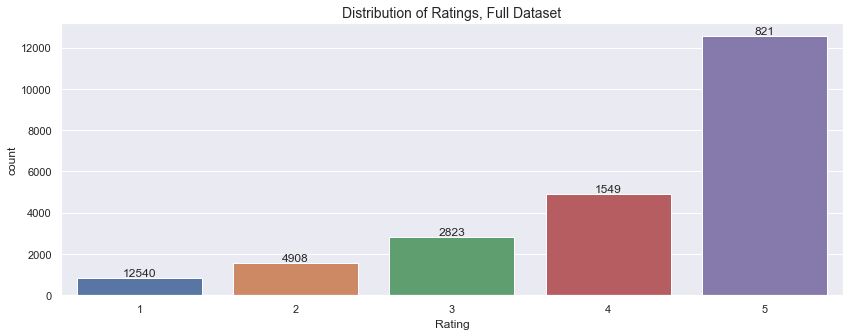

In [12]:
sns.set(style='darkgrid')

plt.figure(figsize=(14,5))
ax = sns.countplot(x='Rating', data = reviews)
ax.set_title("Distribution of Ratings, Full Dataset", fontsize=14)

x=reviews['Rating'].value_counts()

rects = ax.patches
labels = x.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha = 'center', va='bottom')

The ratings seem very skewed to the right, with more five star ratings than any other category. The graphly is linear, and almost exponential in shape.

Now I am going to create the same graph with the dataset that excludes null values.

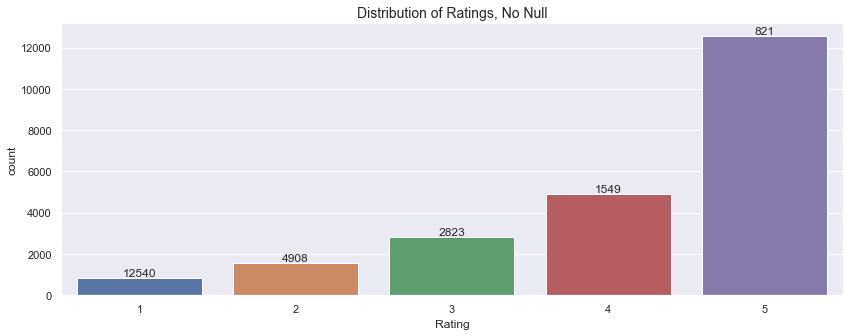

In [13]:
sns.set(style='darkgrid')

plt.figure(figsize=(14,5))
ax = sns.countplot(x='Rating', data = ecom)
ax.set_title("Distribution of Ratings, No Null", fontsize=14)

x=ecom['Rating'].value_counts()

rects = ax.patches
labels = x.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha = 'center', va='bottom')

There is not much difference between the two datasets and it appears the ratings are evenly distributed between the different rating levels. As such, this will not greatly affect the overall dataset evaluation moving forward as the whole of missing valued did not come from only one category.

In [14]:
reviews['Rating'].describe()

count    22641.000000
mean         4.183561
std          1.115762
min          1.000000
25%          4.000000
50%          5.000000
75%          5.000000
max          5.000000
Name: Rating, dtype: float64

In [15]:
ecom['Rating'].describe()

count    22641.000000
mean         4.183561
std          1.115762
min          1.000000
25%          4.000000
50%          5.000000
75%          5.000000
max          5.000000
Name: Rating, dtype: float64

Looking at the summary statistics of the Rating variable, the mean is 4.18 which makes sense looking at the distribution abbove. As we suspected from the graph, there are no outliers outside of the 1-5 rating system, meaning that we do not have to remove any values. The standard deviation is 1.12, which is relatively high for a variable that ranges only from 1 to 5. 

Moving forward, I want to take a look into the ages of the guests.

Text(0.5,1,'Age Distribution')

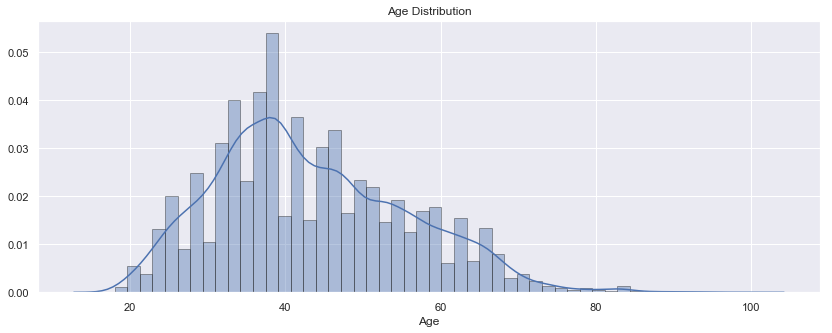

In [16]:
sns.set(style="darkgrid")
plt.figure(figsize = (14,5))
sns.distplot(ecom['Age'], hist_kws = dict(edgecolor = 'k')).set_title("Age Distribution")

There does not appear to be any outliers in the dataset of unusual ages that would be outside the metrics. Most of the ages peak at around 38 and the graph is skewed to the left, meaning it is skewed to report younger ages. This could be because the younger generations are more likely to buy and review clothing online than those of the older age demographic, who may still continue to shop in brick and morter stores, but we do not have anything else at this time to solidify this information.

In [17]:
ecom['Age'].describe()

count    22641.000000
mean        43.280376
std         12.326980
min         18.000000
25%         34.000000
50%         41.000000
75%         52.000000
max         99.000000
Name: Age, dtype: float64

The mean of the data is 43, with a standard deviation of 12.33 which is relatively high. The maximum age is 99 and the minimum age is 18, which seems within the range that would be allowed. It is important to keep in mind that these are self reported ages, meaning there could be errors or guests could be lying about their age, but they would have no factor pushing them to actively lie about their age.

Moving forward, I want to look into the amount of reviews per product category.

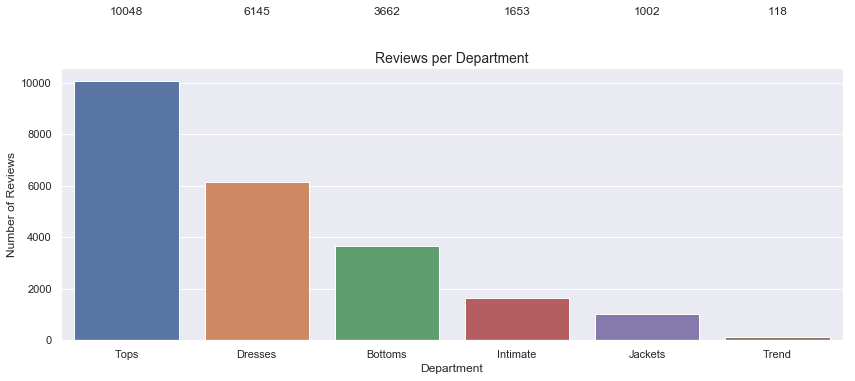

In [18]:
plt.figure(figsize = (14,5))
ax = sns.countplot(x = "Department Name", data=ecom, order = ecom['Department Name'].value_counts().index)
ax.set_title("Reviews per Department", fontsize = 14)
ax.set_ylabel("Number of Reviews", fontsize = 12)
ax.set_xlabel("Department", fontsize = 12)

x = ecom["Department Name"].value_counts()

rects = ax.patches
labels = x.values
for rect, label in zip(rects, labels):
    heights = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha = 'center', va = 'bottom')

Looking at this graph, most of the reviews are for tops, with dresses and bottoms coming in second and third. This means the data isn't evenly distributed between the department types. Looking into this further, I created a box plot to look if the ratings were skewed for each department, to see if tops were being rated loewr than dresses, or some other example. 

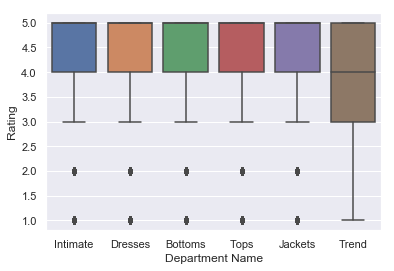

In [19]:
sns.boxplot(x="Department Name", y="Rating", data=ecom)

There does not seem to be a big discrepancy in this graph, but further approaches to make graphs in Python crashed the application because of the amount of data.

We are now moving into adding a length column to start the next analysis, which is what the average length of a review is and what we can determine from this information.

In [20]:
#adding a length column
ecom['Length'] = ecom['Review Text'].apply(len)
ecom.head()

,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,Length
Clothing ID,,,,,,,,,,
767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates,53
1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses,303
1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses,500
1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants,124
847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses,192


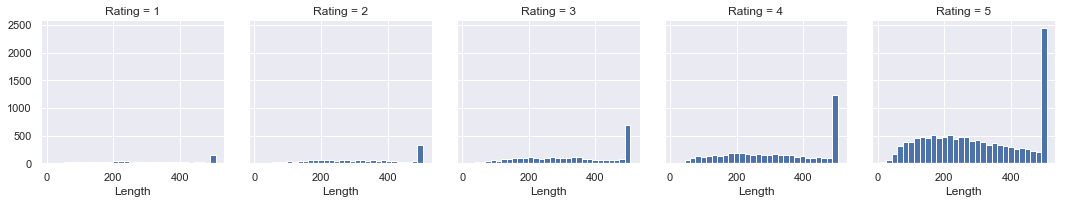

In [21]:
d = sns.FacetGrid(ecom, col='Rating')
d.map(plt.hist,'Length', bins = 30)

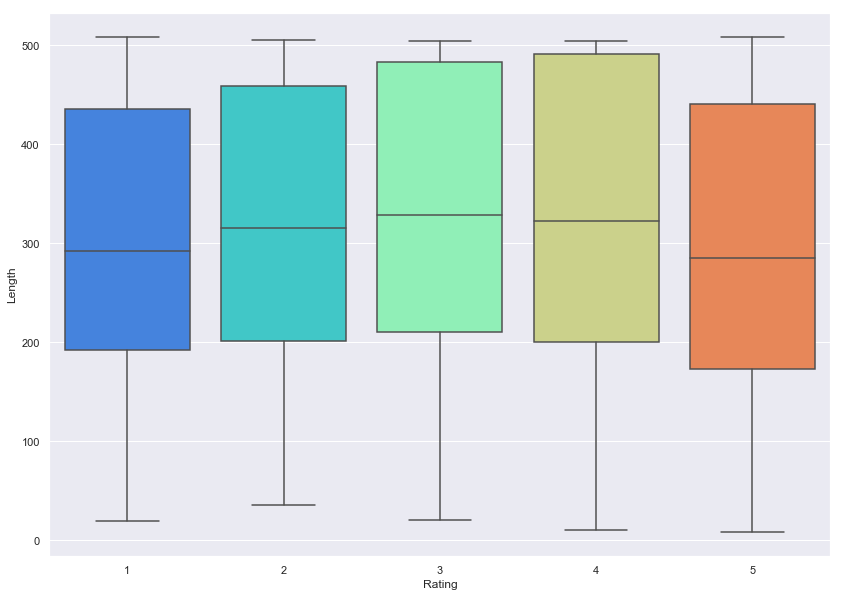

In [22]:
plt.figure(figsize = (14,10))
sns.boxplot(x = 'Rating', y = 'Length', data = ecom, palette = 'rainbow')

Looking first at the averages across all five ratings, there is not a huge discrepancy in where they lie which is good to note. It seems to follow a normal bell curve with ratings of 3 having on average longer reviews than the other categories. Category 4 in particular has a wide range of 1st and 3rd quartiles but there are no huge outliers in the data presented. 

I now want to look into the length of review by department.

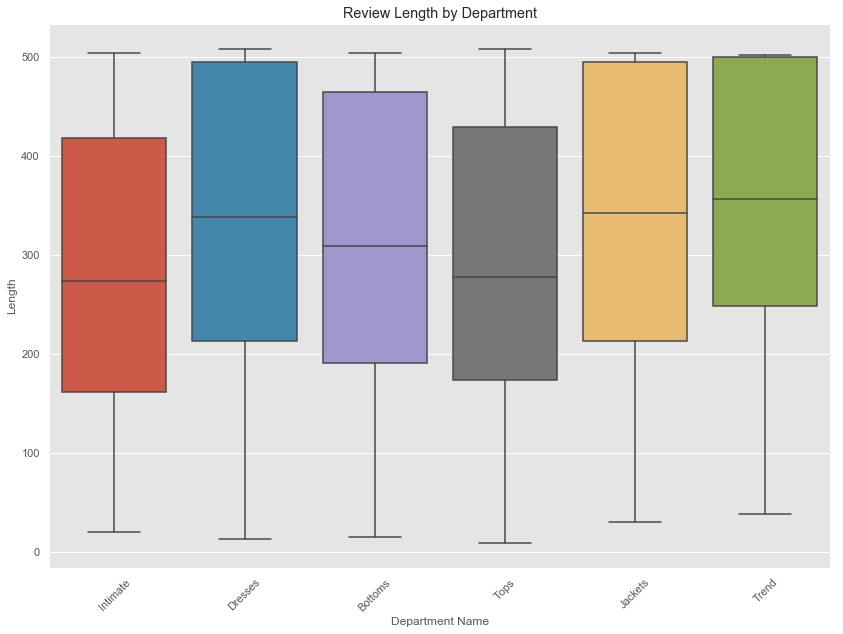

In [23]:
plt.style.use('ggplot')

ax1 = plt.figure(figsize = (14,10))
ax1 = plt.xticks(rotation = 45)
ax1 = sns.boxplot(x = 'Department Name', y = 'Length', data = ecom)
ax1 = plt.title('Review Length by Department')

This box plot shows a little more variability in averages, with dresses and jackets tending to have longer reviews than intimates or tops. I now want to look into trends with recommendations versus not recommended reviews.

In [24]:
recommended = ecom[ecom['Recommended IND']==1]
not_recommended = ecom[ecom['Recommended IND']==0]

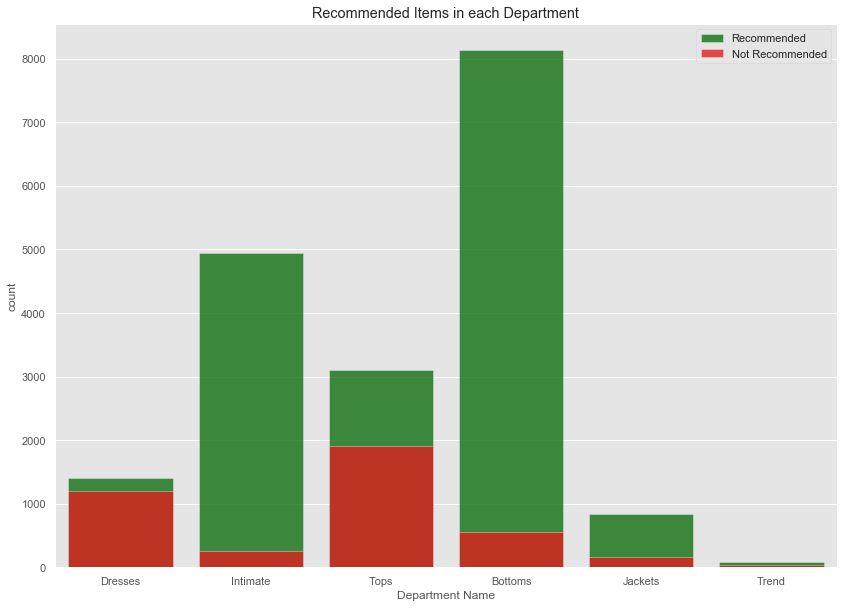

In [25]:
fig = plt.figure(figsize = (14, 10))
ax1 = sns.countplot(recommended['Department Name'], color = "green", alpha = 0.8, label = "Recommended")
ax1 = sns.countplot(not_recommended['Department Name'], color = "red", alpha = 0.8, label = "Not Recommended")
ax1 = plt.title("Recommended Items in each Department")
ax1 = plt.legend()

The intimates, jackets, and bottoms departments have a large percentage of positive recommendations versus the amount of not recommended reviews. However, tops and dresses have a large negative reaction, with dresses being particularly bad. Trend department doesn't have a large percentage either way, but has a relatively low number of reviews overall.

I now want to look into a correlation of the dataset variables.

In [26]:
corr = ecom.corr()
corr

,Age,Rating,Recommended IND,Positive Feedback Count,Length
Age,1.000000,0.029962,0.034208,0.040850,0.014931
Rating,0.029962,1.000000,0.792568,-0.060984,-0.056199
Recommended IND,0.034208,0.792568,1.000000,-0.065923,-0.031519
Positive Feedback Count,0.040850,-0.060984,-0.065923,1.000000,0.191195
Length,0.014931,-0.056199,-0.031519,0.191195,1.000000


[Text(0.5,0,'Age'),
 Text(1.5,0,'Rating'),
 Text(2.5,0,'Recommended IND'),
 Text(3.5,0,'Positive Feedback Count'),
 Text(4.5,0,'Length')]

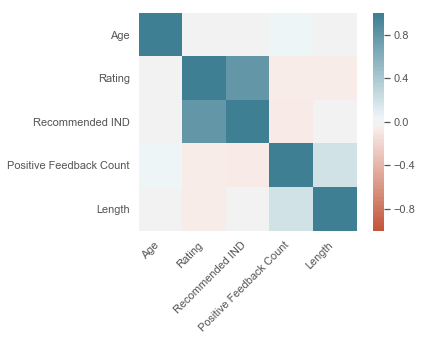

In [27]:
ax = sns.heatmap(
    corr,
    vmin = -1, vmax = 1, center = 0,
    cmap=sns.diverging_palette(20,220,n=200),
    square = True)
ax.set_xticklabels(ax.get_xticklabels(),
                  rotation=45,
                  horizontalalignment = 'right')

Not many of the variables are correlated, but there is a strong correlation between the Rating and the Recommendation Indicator (Recommended IND). This is to be expected, as people who rate the item higher and more likely to recommend the item as they enjoyed using or owning that item. The next closest correlation is between the positive feedback count and the length, meaning that as length increases, the positive feedback count also increases. This correlation is low in significance, but is interesting to keep in mind.

Next, I want to look into the length of reviews overall.

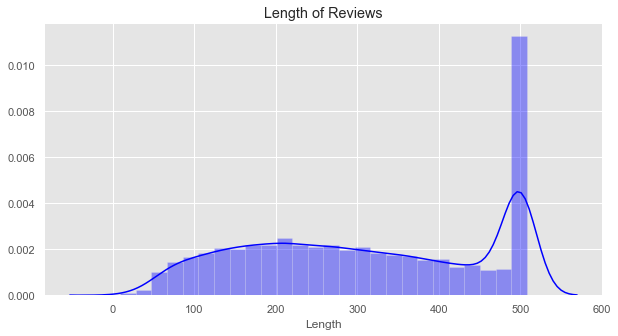

In [28]:
fig = plt.figure(figsize = (10, 5))
ax = sns.distplot(ecom['Length'], color = "blue")
ax = plt.title("Length of Reviews")

This graph is interesting because there is obviously a skew towards longer reviews, but otherwise the graph is a bell curve. We should look into the descriptive statistics of the length variable.

In [30]:
ecom['Length'].describe()

count    22641.000000
mean       308.687911
std        143.940048
min          9.000000
25%        186.000000
50%        301.000000
75%        459.000000
max        508.000000
Name: Length, dtype: float64

The mean of the data set is 308 words, with the maximum being 508. This is important to know that most of the data is not consisting of small review texts that wouldn't provide much input to the study (such as "Great!" "Loved it!") that aren't great feedback for the company overall. Having longer reviews can provide context to the rating, however it can lead to a more intensive process for marketing professionals to parse through hundreds of reviews to gain insights. The sentiment analysis model we are constructing is hopefully going to solve that.

Moving on, let's find out how many times some words were used. 

In [31]:
vectorizer = CountVectorizer()
analyzer = vectorizer.build_analyzer()

In [32]:
def wordcounts(s):
    c = {}
    if analyzer(s):
        d= {}
        w = vectorizer.fit_transform([s]).toarray()
        vc = vectorizer.vocabulary_
        for k,v in vc.items():
            d[v]=k
        for index,i in enumerate(w[0]):
            c[d[index]] = i
    return c

In [33]:
ecom["Word Counts"] = ecom["Review Text"].apply(wordcounts)

In [34]:
ecom.head()

,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,Length,Word Counts
Clothing ID,,,,,,,,,,,
767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates,53,"{'absolutely': 1, 'and': 2, 'comfortable': 1, ..."
1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses,303,"{'am': 1, 'and': 2, 'bc': 2, 'be': 1, 'below':..."
1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses,500,"{'and': 3, 'be': 1, 'bottom': 1, 'but': 2, 'ch..."
1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants,124,"{'and': 1, 'but': 1, 'compliments': 1, 'every'..."
847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses,192,"{'adjustable': 1, 'all': 1, 'and': 1, 'any': 1..."


We are now going to see what the word desnities are, particularly looking at sentiment such as love or hate. 

In [35]:
selectedwords = ['awesome','great','fantastic','amazing','super',
                 'magnificent','stunning','impressive','wonderful',
                 'love','content','pleased','happy','glad','satisfied','lucky',
                'cheerful','wow','sad','unhappy','horrible','regret',
                 'bad','terrible','annoyed','disappointed','upset','awful','hate']

In [36]:
def selectedcount(dic, word):
    if word in dic: 
        return dic[word]
    else:
        return 0

In [37]:
ecomwc = ecom.copy()
for word in selectedwords:
    ecomwc[word] = ecomwc['Word Counts'].apply(selectedcount, args = (word,))

In [38]:
word_sum = ecomwc[selectedwords].sum()
print("Selected Words")
print(word_sum.sort_values(ascending=False).iloc[:5])

print("\nClass Names")
print(ecom['Class Name'].fillna("Empty").value_counts().iloc[:5])

Selected Words
love     8951
great    6117
super    1726
happy     705
glad      614
dtype: int64

Class Names
Dresses     6145
Knits       4626
Blouses     2983
Sweaters    1380
Pants       1350
Name: Class Name, dtype: int64


It seems that positive words such as love, great, super, and happy were used more often than negative words. The classes that people preferred to talk about were dresses and knits. 

## Model Creation

Moving on to creating the sentiment classifier, I first needed to create a column that shows the sentiment as positive or negative in the dataset. For the purpose of being able to classify reviews, I am putting reviews that are rated 4 or 5 as positive (or True), and ratings of 2 or lower as negative (False). Reviews that contained neutral ratings (3) were excluded.

In [40]:
ecom = ecom[ecom["Rating"] != 3]
ecom["Sentiment"] = ecom["Rating"] >= 4
ecom.head()

,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,Length,Word Counts,Sentiment
Clothing ID,,,,,,,,,,,,
767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates,53,"{'absolutely': 1, 'and': 2, 'comfortable': 1, ...",True
1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses,303,"{'am': 1, 'and': 2, 'bc': 2, 'be': 1, 'below':...",True
1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants,124,"{'and': 1, 'but': 1, 'compliments': 1, 'every'...",True
847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses,192,"{'adjustable': 1, 'all': 1, 'and': 1, 'any': 1...",True
1080,49,Not for the very petite,"I love tracy reese dresses, but this one is no...",2,0,4,General,Dresses,Dresses,488,"{'0p': 1, 'alterations': 1, 'am': 1, 'and': 4,...",False


I am now splitting the dataset into a training and a test set. 

In [41]:
train_data, test_data = train_test_split(ecom, train_size = 0.8, random_state = 0)
X_train = vectorizer.fit_transform(train_data["Review Text"])
y_train = train_data["Sentiment"]
X_test = vectorizer.transform(test_data["Review Text"])
y_test = test_data["Sentiment"]

Logistic Regression

In [42]:
start = dt.datetime.now()
lr = LogisticRegression()
lr.fit(X_train, y_train)
print("Elapsed time: ", str(dt.datetime.now()-start))

Elapsed time:  0:00:01.474803


Naive Bayes

In [43]:
start=dt.datetime.now()
nb = MultinomialNB()
nb.fit(X_train,y_train)
print('Elapsed time: ',str(dt.datetime.now()-start))

Elapsed time:  0:00:00.239662


Support Vector Machine (SVM)

In [44]:
start=dt.datetime.now()
svm = SVC()
svm.fit(X_train,y_train)
print('Elapsed time: ',str(dt.datetime.now()-start))

Elapsed time:  0:00:43.407053


Neural Network

In [45]:
start=dt.datetime.now()
nn = MLPClassifier()
nn.fit(X_train,y_train)
print('Elapsed time: ',str(dt.datetime.now()-start))

Elapsed time:  0:03:44.088380


I am now going to add these results to the dataframe, ecom. I am first adding the prediction results to the training data.

In [46]:
df2 = train_data.copy()
df2['Logistic Regression'] = lr.predict(X_train)
df2['Naive Bayes'] = nb.predict(X_train)
df2['SVM'] = svm.predict(X_train)
df2['Neural Network'] = nn.predict(X_train)
df2.head()

,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,Length,Word Counts,Sentiment,Logistic Regression,Naive Bayes,SVM,Neural Network
Clothing ID,,,,,,,,,,,,,,,,
1094,59,NaN,Love this dress so beautiful embroidery is lov...,5,1,0,General,Dresses,Dresses,76,"{'beautiful': 1, 'dress': 1, 'embroidery': 1, ...",True,True,True,True,True
867,52,Cute top,I got this top in white and it is cute. the fa...,4,1,1,General,Tops,Knits,175,"{'and': 3, 'around': 1, 'chest': 1, 'cute': 1,...",True,True,True,True,True
863,21,Light and airy,I got this shirt in light blue. i absolutely l...,4,1,0,General,Tops,Knits,291,"{'85': 1, 'absolutely': 1, 'am': 1, 'an': 1, '...",True,True,True,True,True
872,45,Versatile,Great color and fabric! a bit on the sheer sid...,5,1,0,General Petite,Tops,Knits,320,"{'additional': 1, 'and': 3, 'available': 1, 'b...",True,True,True,True,True
996,40,If you're craving the marsupial look...,Then this one is for you! so disappointed upon...,2,0,6,General,Bottoms,Skirts,499,"{'abdomen': 1, 'actually': 1, 'already': 1, 'a...",False,False,False,True,False


I am now going to look at the prediction probabilities of the models in a separate dataset.

In [47]:
df1 = train_data.copy()
df1['Logistic Regression'] = lr.predict_proba(X_train)[:,1]
df1['Naive Bayes'] = nb.predict_proba(X_train)[:,1]
df1['SVM'] = svm.decision_function(X_train)
df1['Neural Network'] = nn.predict_proba(X_train)[:,1]
df1=df1.round(2)
df1.head()

,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,Length,Word Counts,Sentiment,Logistic Regression,Naive Bayes,SVM,Neural Network
Clothing ID,,,,,,,,,,,,,,,,
1094,59,NaN,Love this dress so beautiful embroidery is lov...,5,1,0,General,Dresses,Dresses,76,"{'beautiful': 1, 'dress': 1, 'embroidery': 1, ...",True,1.00,1.00,1.02,1.0
867,52,Cute top,I got this top in white and it is cute. the fa...,4,1,1,General,Tops,Knits,175,"{'and': 3, 'around': 1, 'chest': 1, 'cute': 1,...",True,0.91,0.85,1.00,1.0
863,21,Light and airy,I got this shirt in light blue. i absolutely l...,4,1,0,General,Tops,Knits,291,"{'85': 1, 'absolutely': 1, 'am': 1, 'an': 1, '...",True,1.00,1.00,1.03,1.0
872,45,Versatile,Great color and fabric! a bit on the sheer sid...,5,1,0,General Petite,Tops,Knits,320,"{'additional': 1, 'and': 3, 'available': 1, 'b...",True,1.00,1.00,1.03,1.0
996,40,If you're craving the marsupial look...,Then this one is for you! so disappointed upon...,2,0,6,General,Bottoms,Skirts,499,"{'abdomen': 1, 'actually': 1, 'already': 1, 'a...",False,0.00,0.00,0.92,0.0


I am now going to create ROC curves for the models to illustrate the diagnostic ability as the discrimination threshold is varied. Particularly, we will be using the AUC ROC curve which is used to check model performance.

In [48]:
pred_lr = lr.predict_proba(X_test)[:,1]
fpr_lr,tpr_lr,_ = roc_curve(y_test,pred_lr)
roc_auc_lr = auc(fpr_lr,tpr_lr)

pred_nb = nb.predict_proba(X_test)[:,1]
fpr_nb,tpr_nb,_ = roc_curve(y_test.values,pred_nb)
roc_auc_nb = auc(fpr_nb,tpr_nb)

pred_svm = svm.decision_function(X_test)
fpr_svm,tpr_svm,_ = roc_curve(y_test.values,pred_svm)
roc_auc_svm = auc(fpr_svm,tpr_svm)

pred_nn = nn.predict_proba(X_test)[:,1]
fpr_nn,tpr_nn,_ = roc_curve(y_test.values,pred_nn)
roc_auc_nn = auc(fpr_nn,tpr_nn)

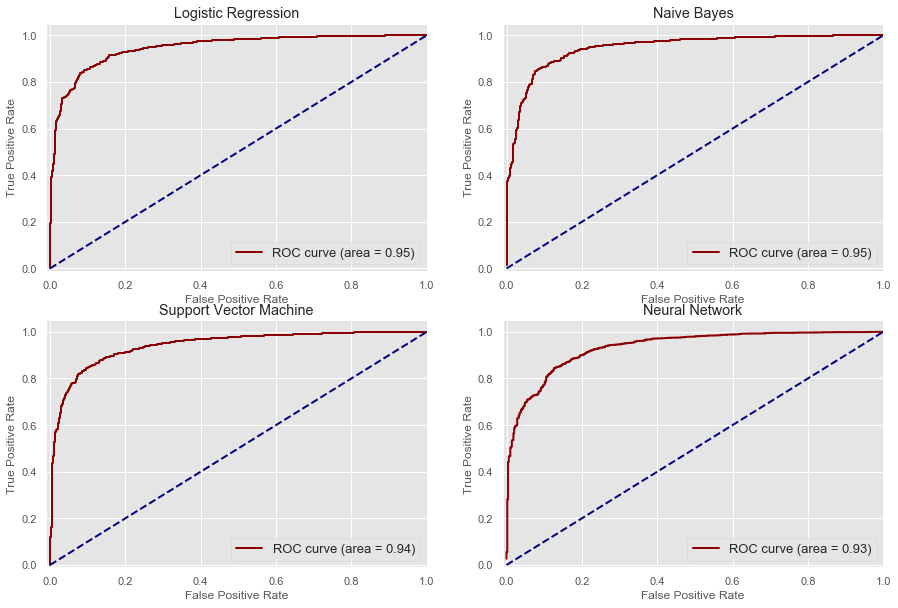

In [49]:
f, axes = plt.subplots(2, 2,figsize=(15,10))
axes[0,0].plot(fpr_lr, tpr_lr, color='darkred', lw=2, label='ROC curve (area = {:0.2f})'.format(roc_auc_lr))
axes[0,0].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
axes[0,0].set(xlim=[-0.01, 1.0], ylim=[-0.01, 1.05])
axes[0,0].set(xlabel ='False Positive Rate', ylabel = 'True Positive Rate', title = 'Logistic Regression')
axes[0,0].legend(loc='lower right', fontsize=13)

axes[0,1].plot(fpr_nb, tpr_nb, color='darkred', lw=2, label='ROC curve (area = {:0.2f})'.format(roc_auc_nb))
axes[0,1].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
axes[0,1].set(xlim=[-0.01, 1.0], ylim=[-0.01, 1.05])
axes[0,1].set(xlabel ='False Positive Rate', ylabel = 'True Positive Rate', title = 'Naive Bayes')
axes[0,1].legend(loc='lower right', fontsize=13)

axes[1,0].plot(fpr_svm, tpr_svm, color='darkred', lw=2, label='ROC curve (area = {:0.2f})'.format(roc_auc_svm))
axes[1,0].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
axes[1,0].set(xlim=[-0.01, 1.0], ylim=[-0.01, 1.05])
axes[1,0].set(xlabel ='False Positive Rate', ylabel = 'True Positive Rate', title = 'Support Vector Machine')
axes[1,0].legend(loc='lower right', fontsize=13)

axes[1,1].plot(fpr_nn, tpr_nn, color='darkred', lw=2, label='ROC curve (area = {:0.2f})'.format(roc_auc_nn))
axes[1,1].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
axes[1,1].set(xlim=[-0.01, 1.0], ylim=[-0.01, 1.05])
axes[1,1].set(xlabel ='False Positive Rate', ylabel = 'True Positive Rate', title = 'Neural Network')
axes[1,1].legend(loc='lower right', fontsize=13);

I am now created a confusion matrix, which is a table that is used to describe the performance of a classification model on the test data for which true values are known. 

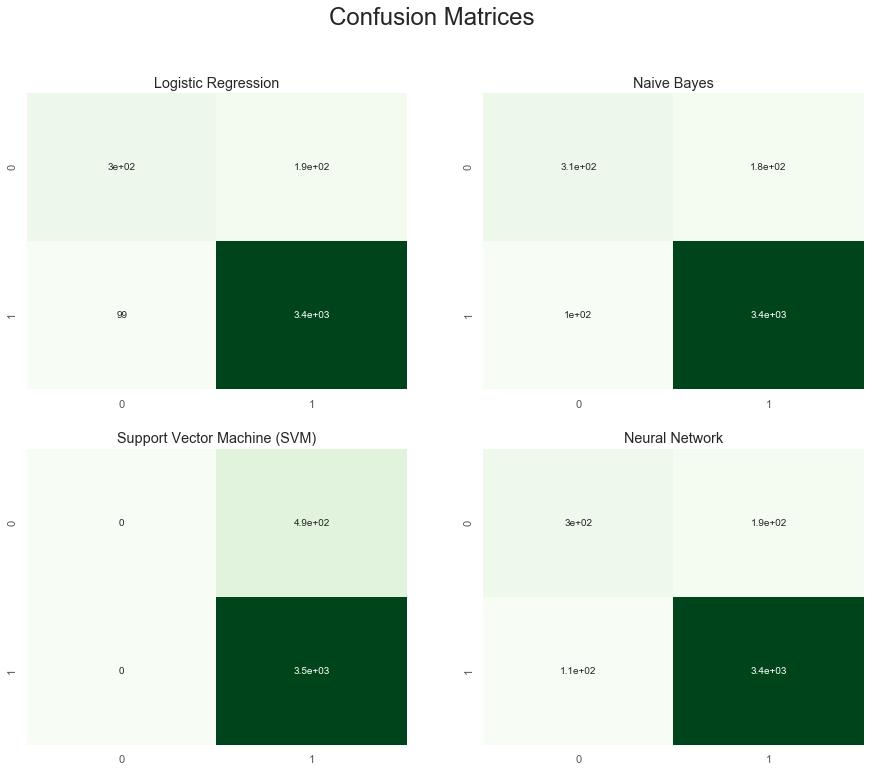

In [50]:
lr_cm=confusion_matrix(y_test.values, lr.predict(X_test))
nb_cm=confusion_matrix(y_test.values, nb.predict(X_test))
svm_cm=confusion_matrix(y_test.values, svm.predict(X_test))
nn_cm=confusion_matrix(y_test.values, nn.predict(X_test))

plt.figure(figsize=(15,12))
plt.suptitle("Confusion Matrices",fontsize=24)

plt.subplot(2,2,1)
plt.title("Logistic Regression")
sns.heatmap(lr_cm, annot = True, cmap="Greens",cbar=False);

plt.subplot(2,2,2)
plt.title("Naive Bayes")
sns.heatmap(nb_cm, annot = True, cmap="Greens",cbar=False);

plt.subplot(2,2,3)
plt.title("Support Vector Machine (SVM)")
sns.heatmap(svm_cm, annot = True, cmap="Greens",cbar=False);

plt.subplot(2,2,4)
plt.title("Neural Network")
sns.heatmap(nn_cm, annot = True, cmap="Greens",cbar=False);


When we look into evaluating these models, Naive Bayes and Logistic Regression have the best results for the data used. When we look at the time it took to complete, Naive Bayes has a lower completition time, which could make this model more beneficial over Logisitc Regression.